In [1]:
import os, subprocess
import json
import uproot3
import awkward as ak
import numpy as np
from coffea import processor, util, hist

from plotter import *

In [2]:
lumis = {}
lumis['2016'] = 35.9
lumis['2017'] = 41.5
lumis['2018'] = 59.9

with open('xsec.json') as f:
  xs = json.load(f)

with open('pmap.json') as f:
  pmap = json.load(f)

systematics = ['nominal',
               'jet_triggerUp','jet_triggerDown',
               'btagWeightUp','btagWeightDown','btagEffStatUp','btagEffStatDown',
               'UESUp','UESDown','JESUp','JESDown','JERUp','JERDown',
              ]

In [3]:
year = '2017'
nfiles = len(subprocess.getoutput("ls infiles-split/"+year+"*.json").split())
outsum = processor.dict_accumulator()

In [4]:
# Read the histogram from the pickle file
templates = pickle.load('pickles/templates.pkl','rb'))

2416 dict_keys(['WJetsToLNu_HT-800To1200_TuneCP5_13TeV-madgraphMLM-pythia8'])


In [6]:
# check intergrals
templates.sum('pt1','msd1','ddb1').integrate('region','signal').integrate('systematic', 'nominal').values()

{('ZH',): array(4.22979325),
 ('WH',): array(4.63176751),
 ('ttH',): array(2.32781477),
 ('VBF',): array(1.96216295),
 ('ggF',): array(5.42675188),
 ('ggF-powheg',): array(11.31186572),
 ('QCD',): array(262493.83390094),
 ('VV',): array(313.16499657),
 ('Wjets',): array(8389.32494526),
 ('Zjets',): array(3935.49367506),
 ('ttbar',): array(2835.04232795),
 ('singlet',): array(469.43036583),
 ('data',): array(238777.),
 ('muondata',): array(4976.)}

In [7]:
h = templates.sum('pt1','ddb1').integrate('region', 'signal')
mc = ['QCD','Wjets','Zjets','ttbar','singlet','VV','ggF','VBF','ZH','WH']

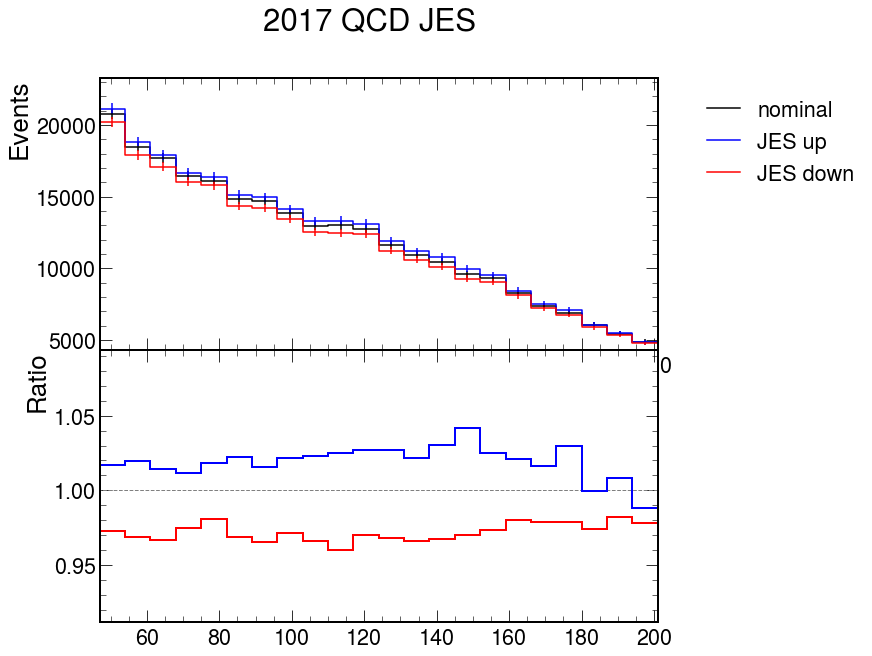

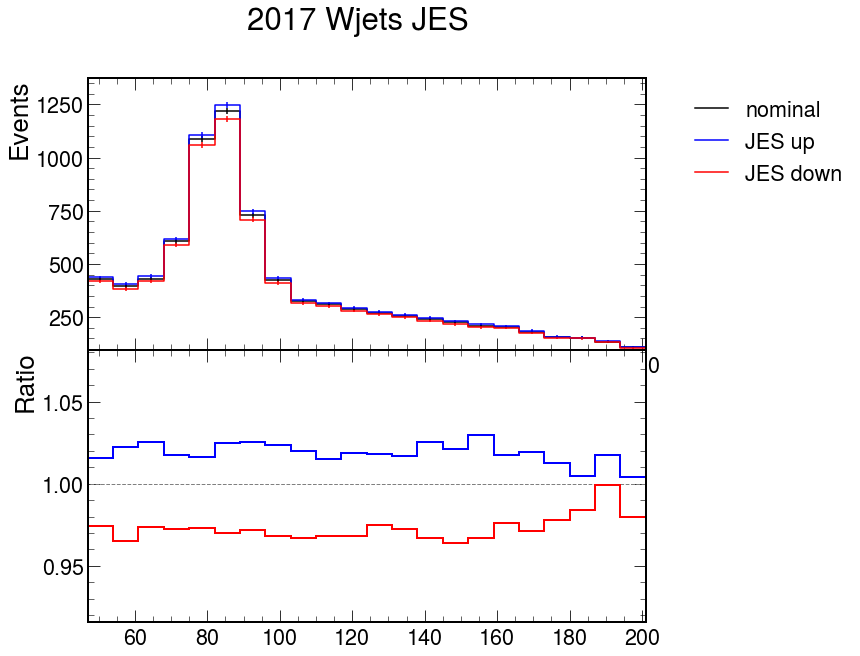

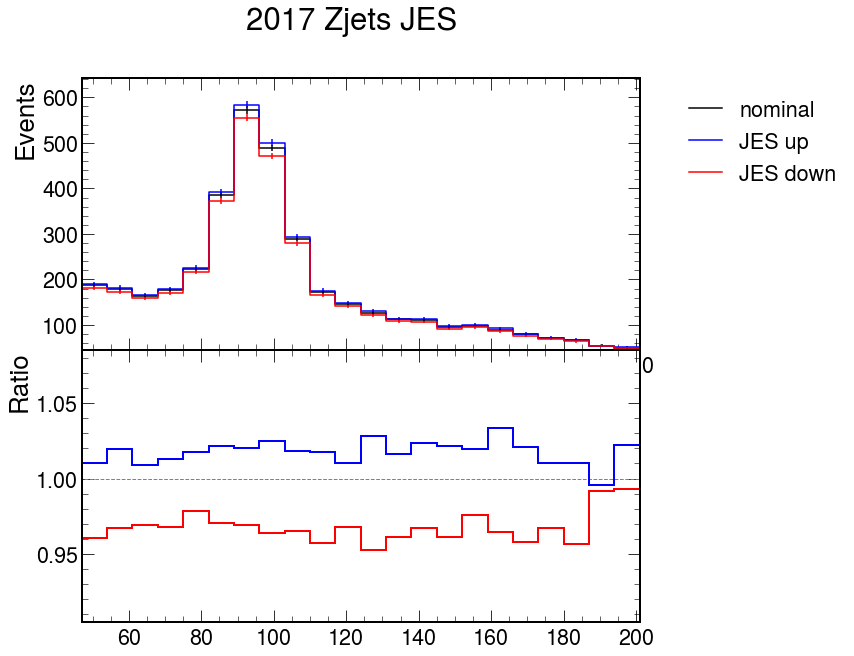

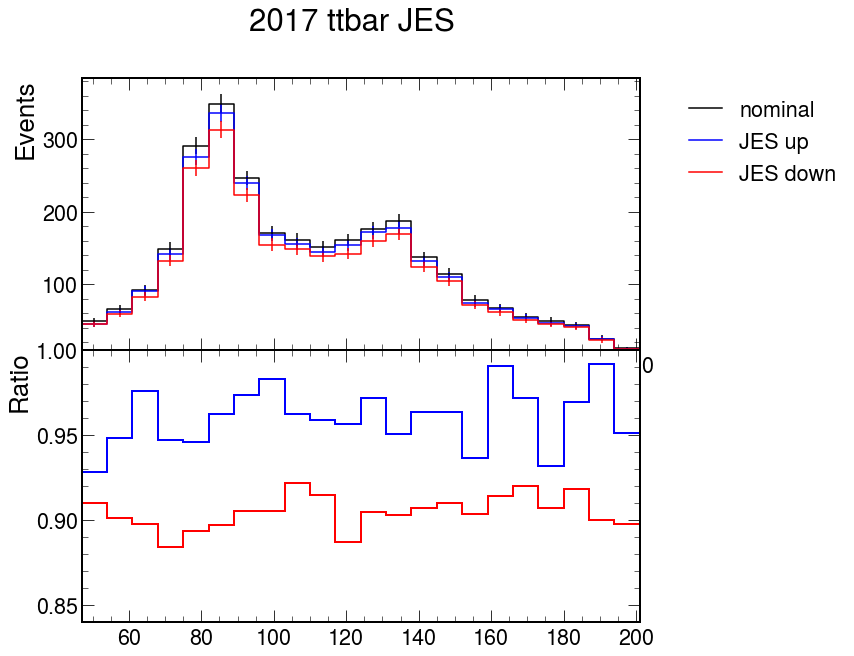

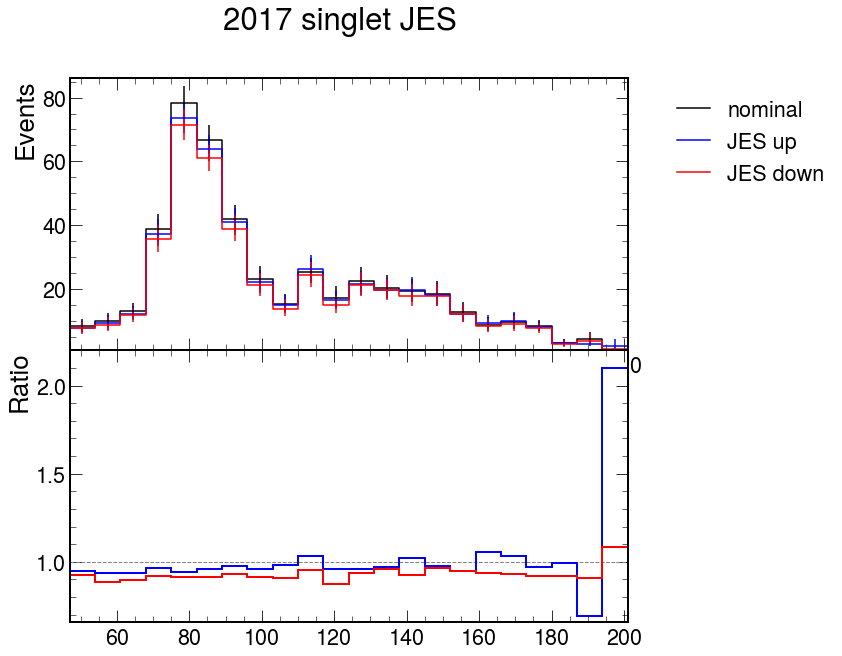

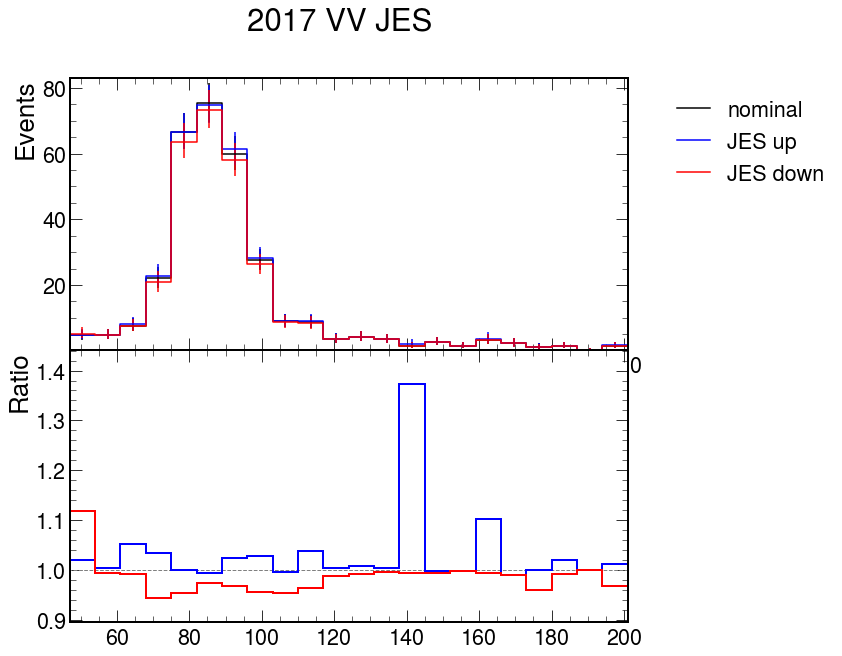

In [10]:
for p in mc:
    plot_syst(h.integrate('process',p),'JES', year+' '+p+' JES', year+'/syst_JES/'+p)

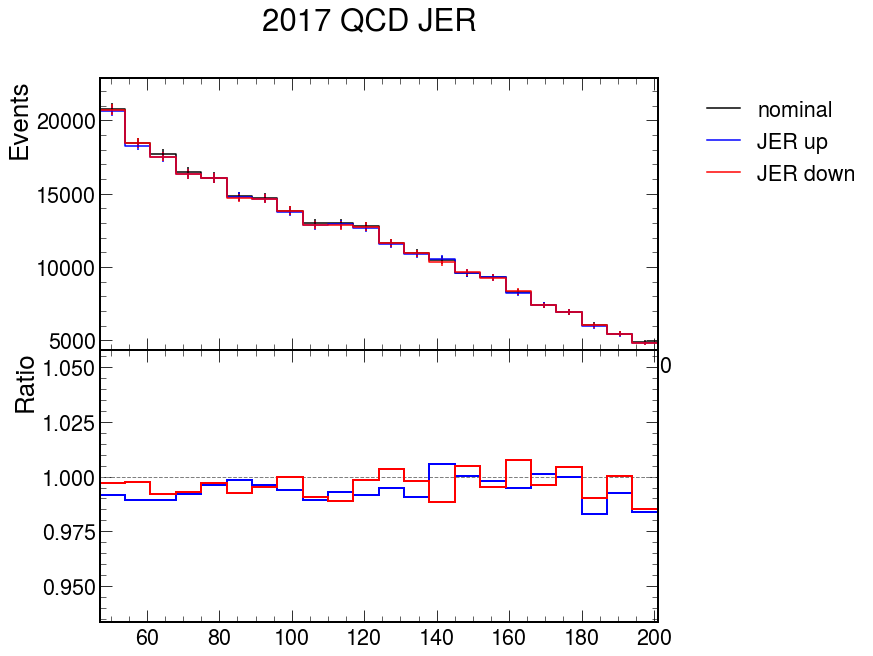

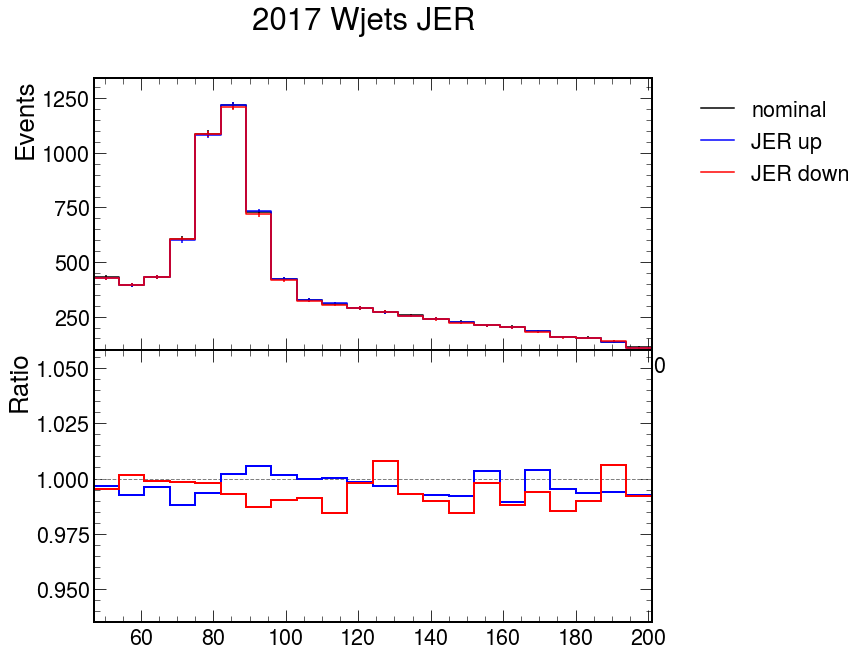

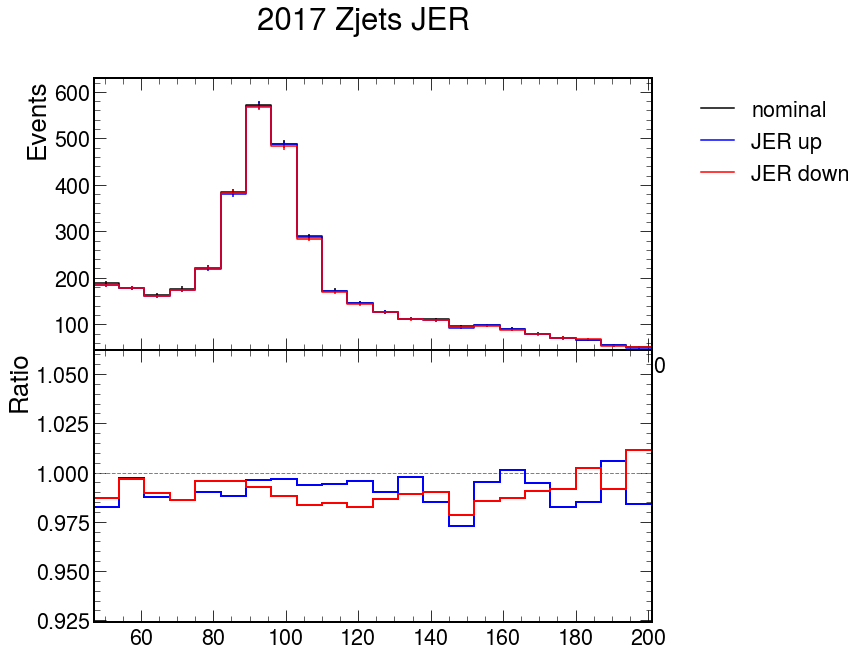

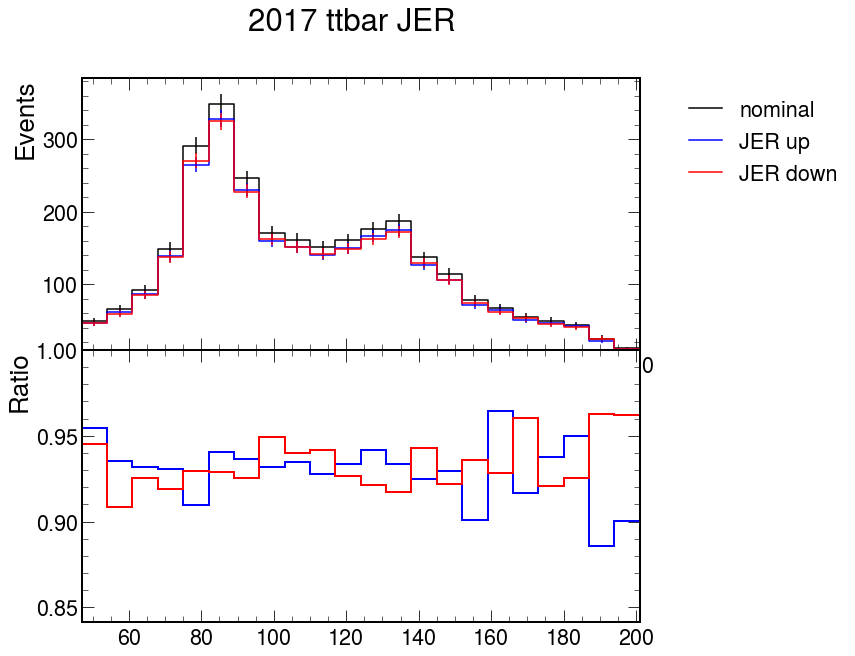

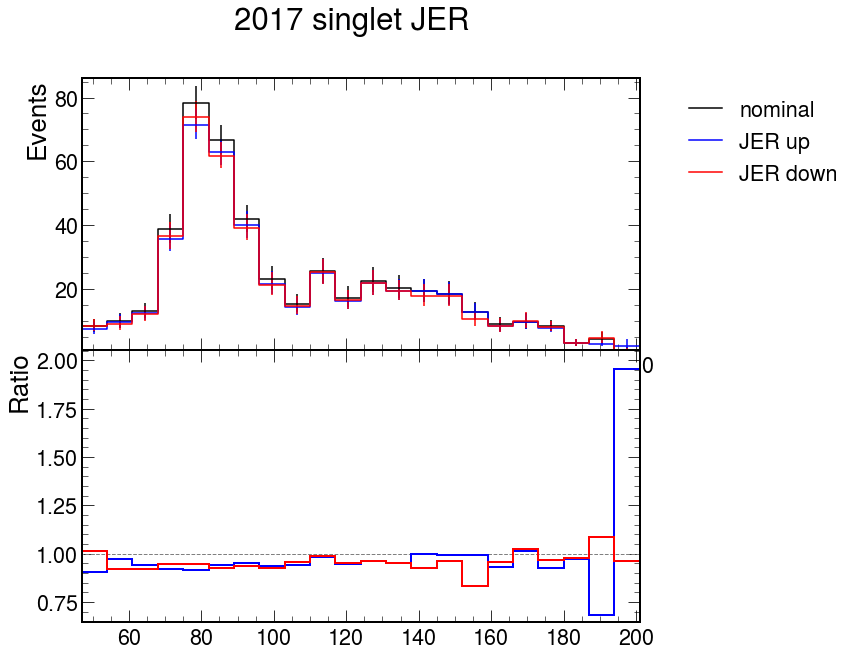

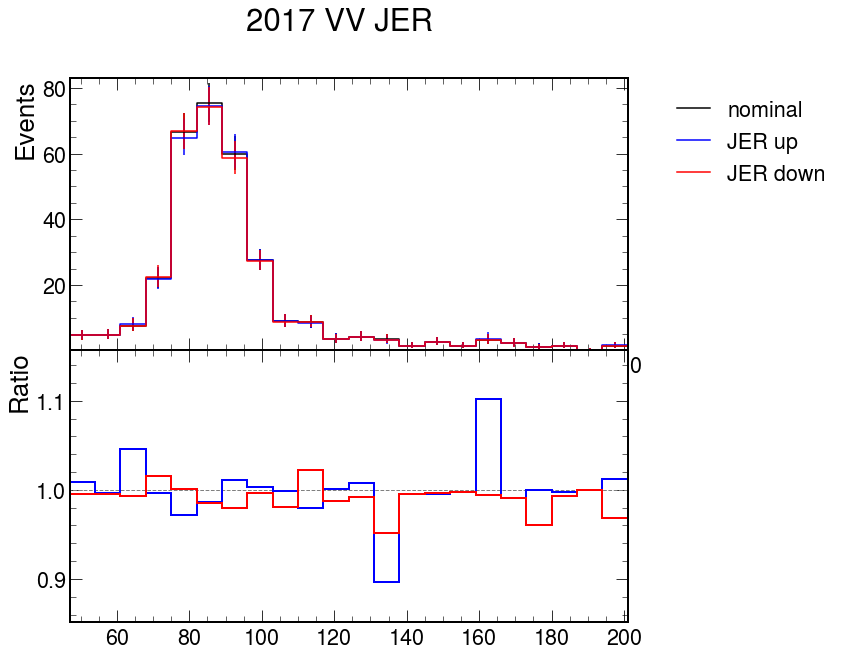

In [11]:
for p in mc:
    plot_syst(h.integrate('process',p),'JER',year+' '+p+' JER',year+'/syst_JER/'+p)

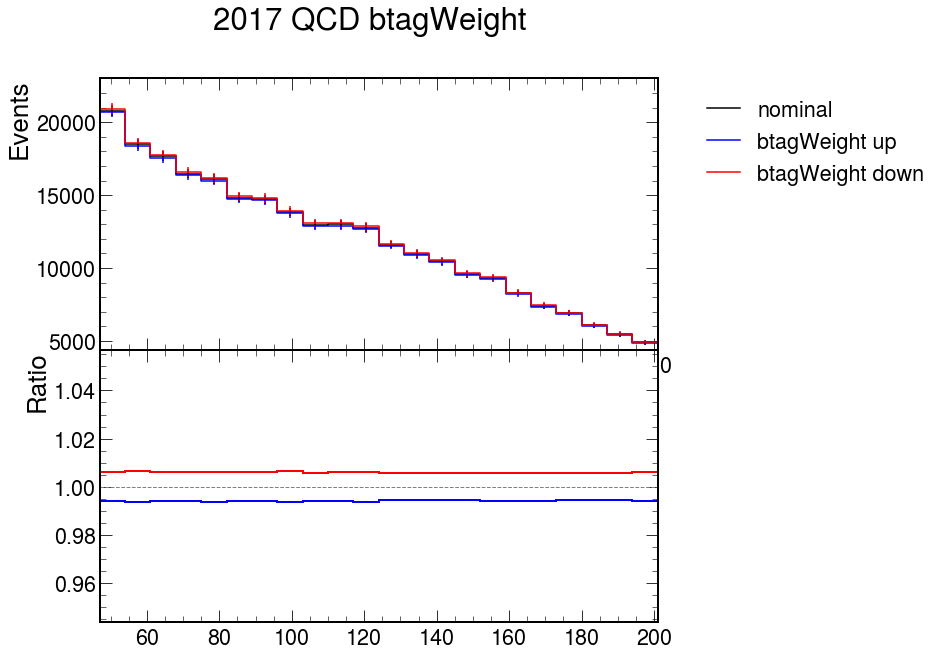

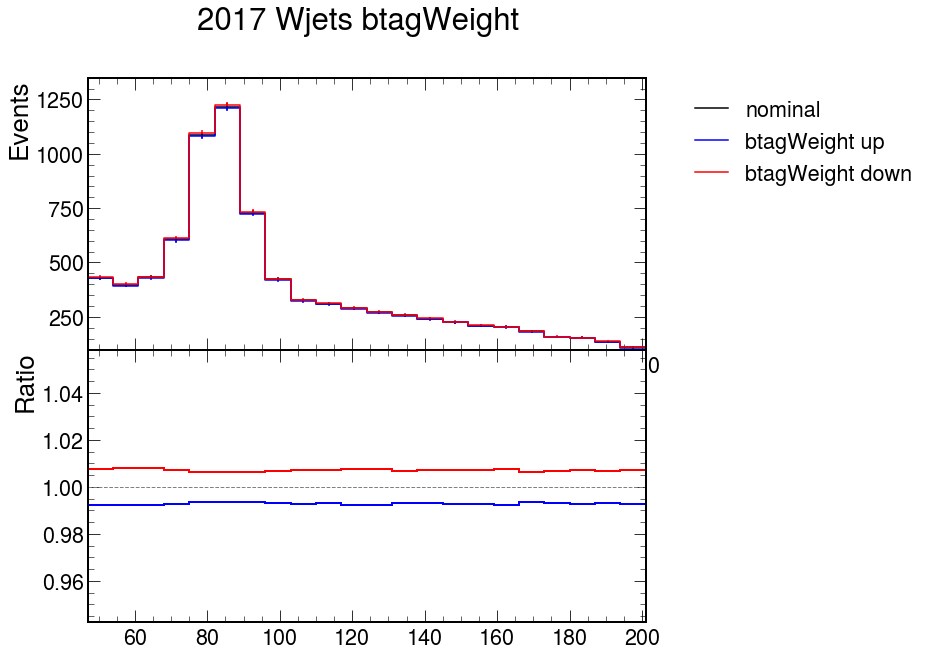

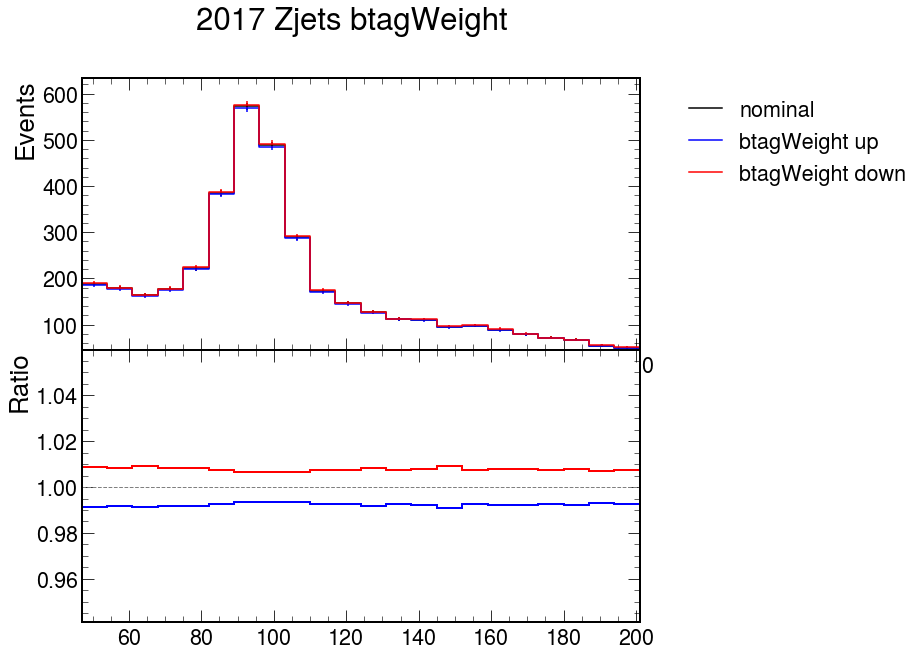

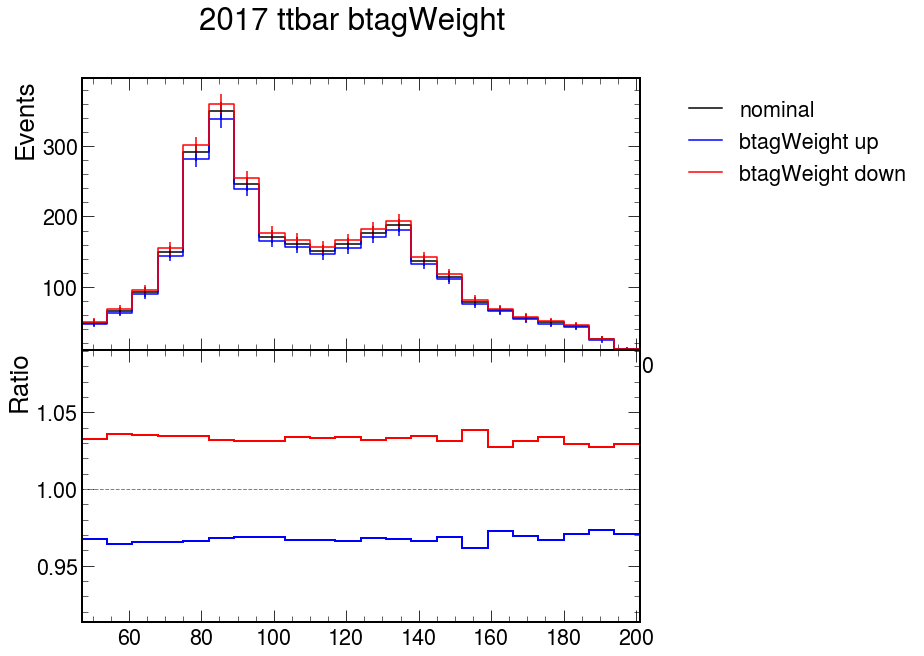

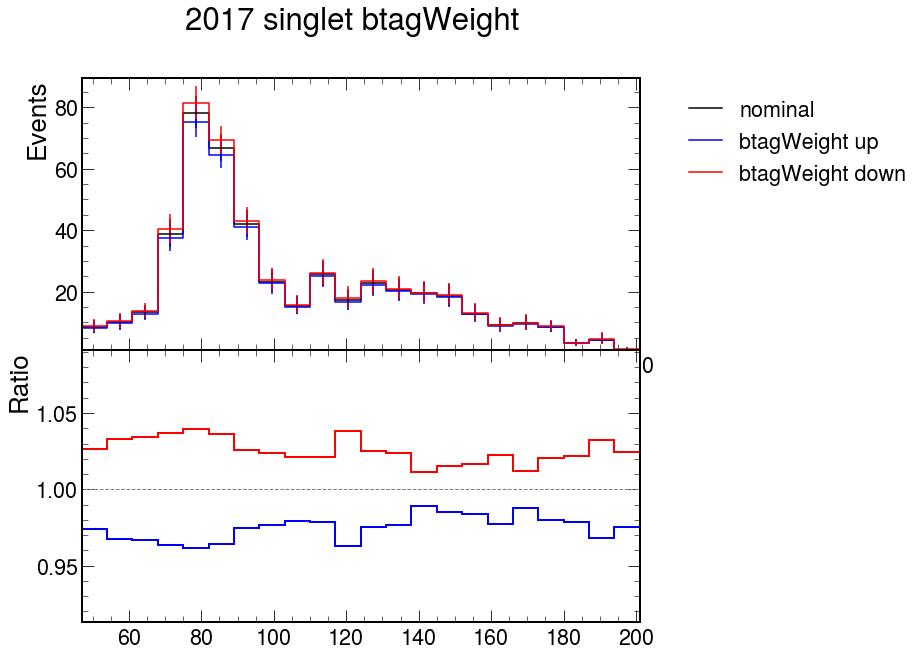

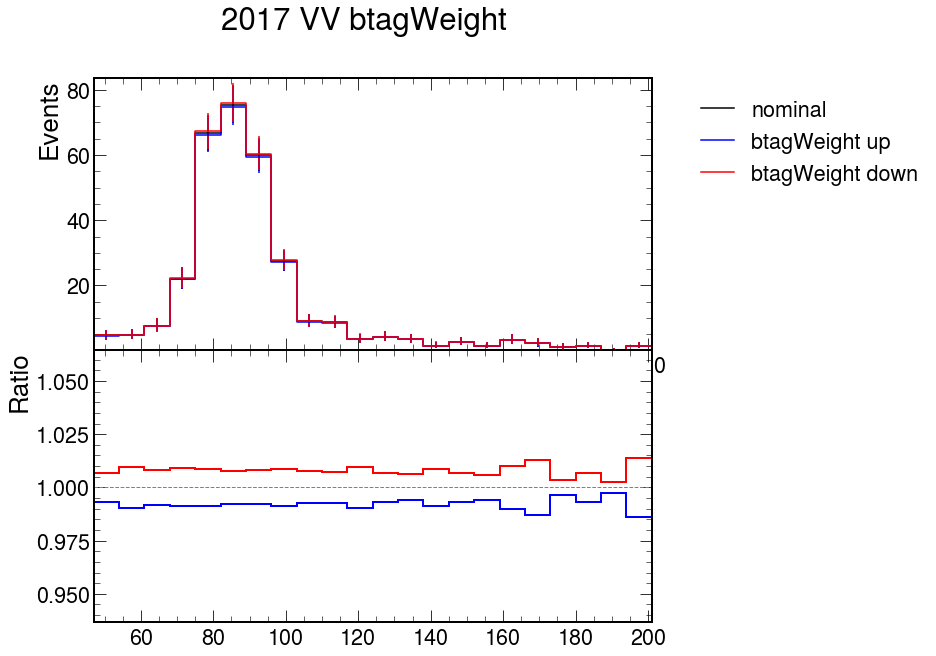

In [13]:
for p in mc:
    plot_syst(h.integrate('process',p),'btagWeight',year+' '+p+' btagWeight',year+'/syst_btagWeight/'+p)

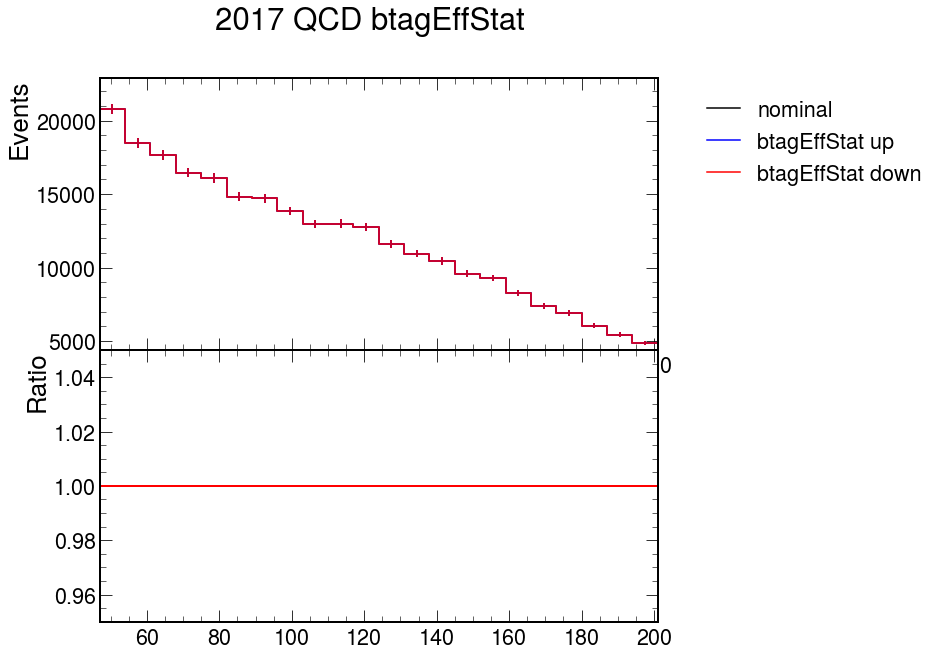

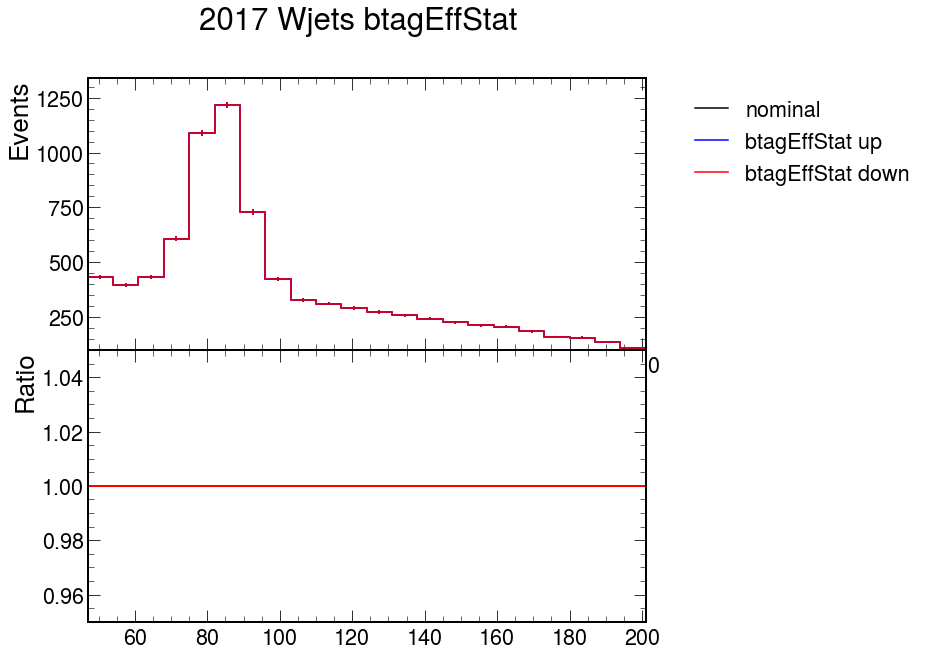

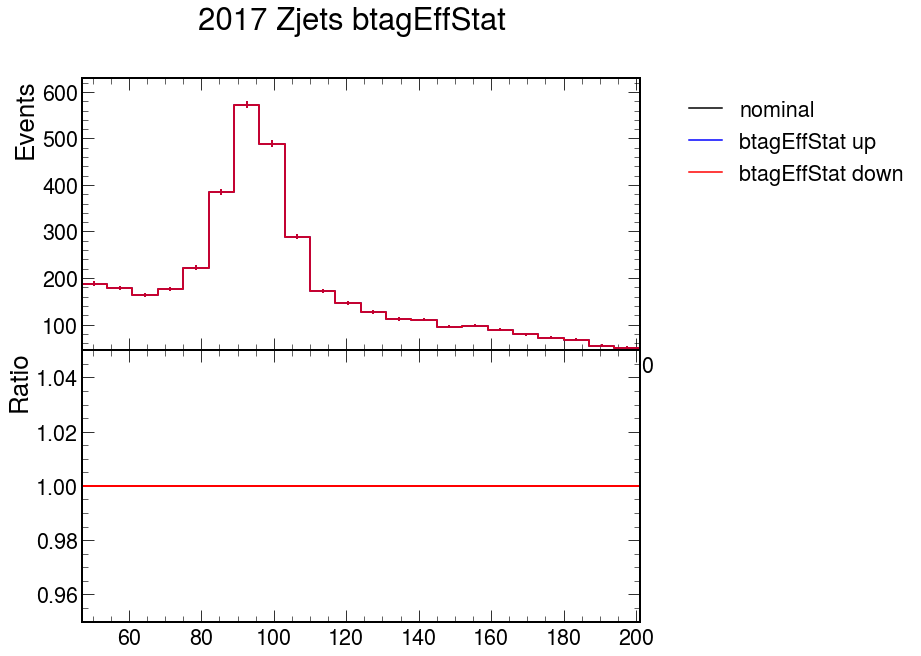

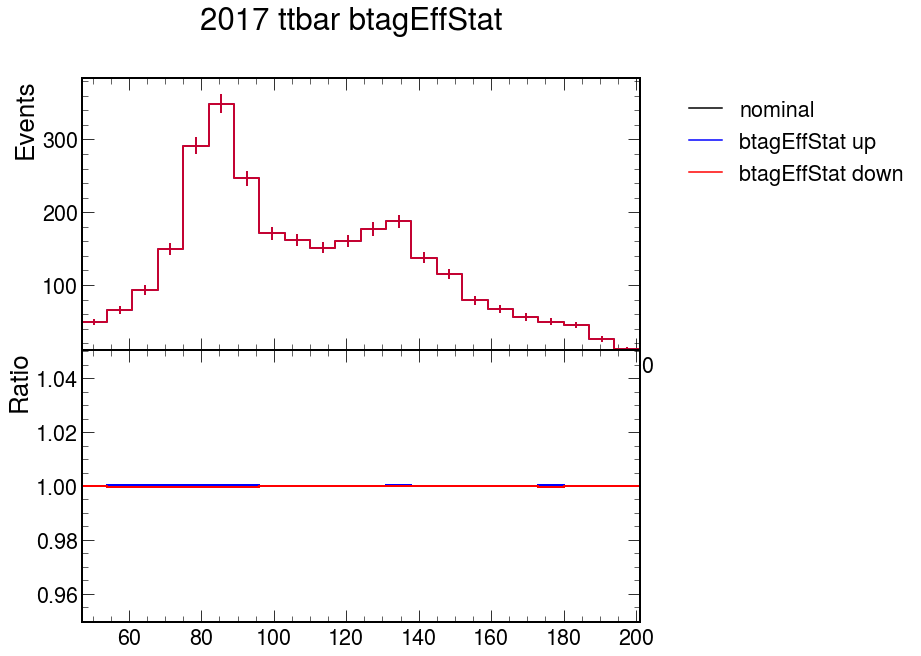

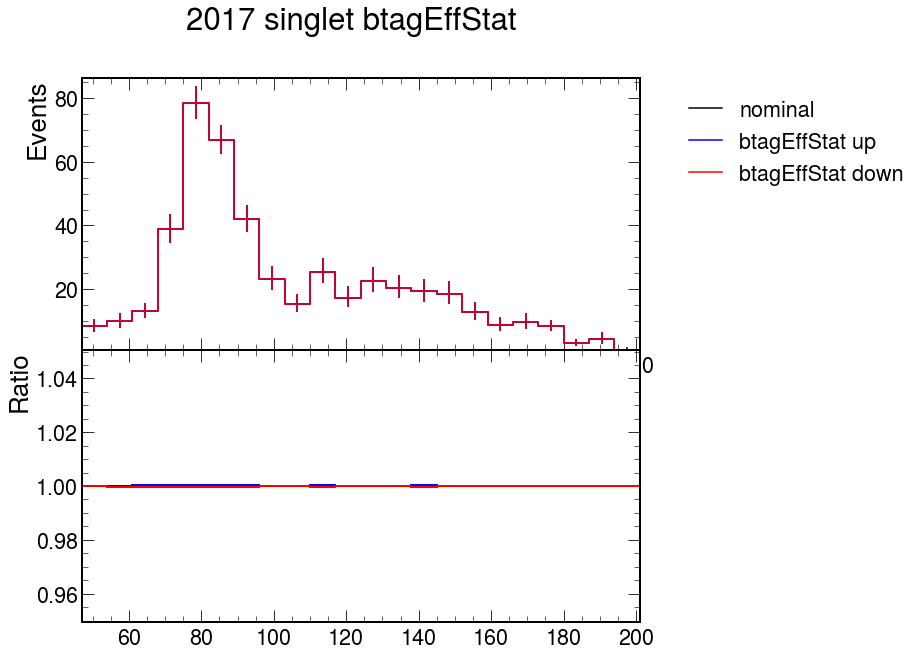

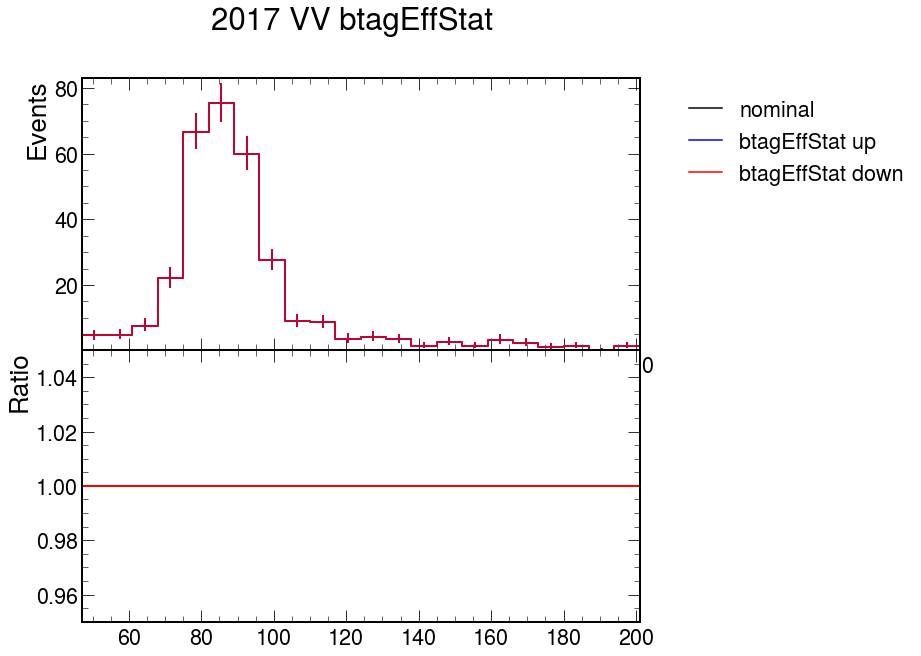

In [14]:
for p in mc:
    plot_syst(h.integrate('process',p),'btagEffStat',year+' '+p+' btagEffStat',year+'/syst_btagEffStat/'+p)

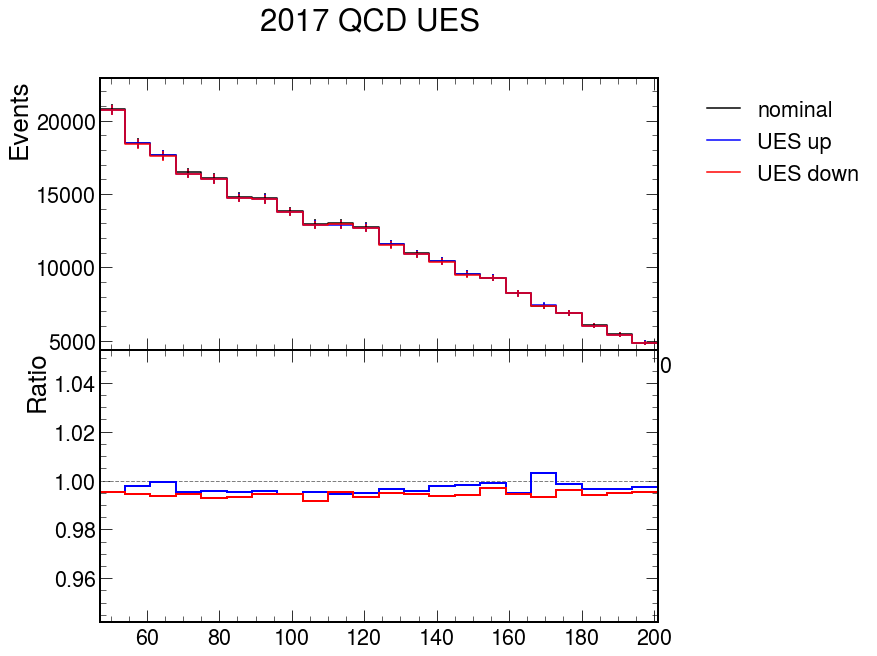

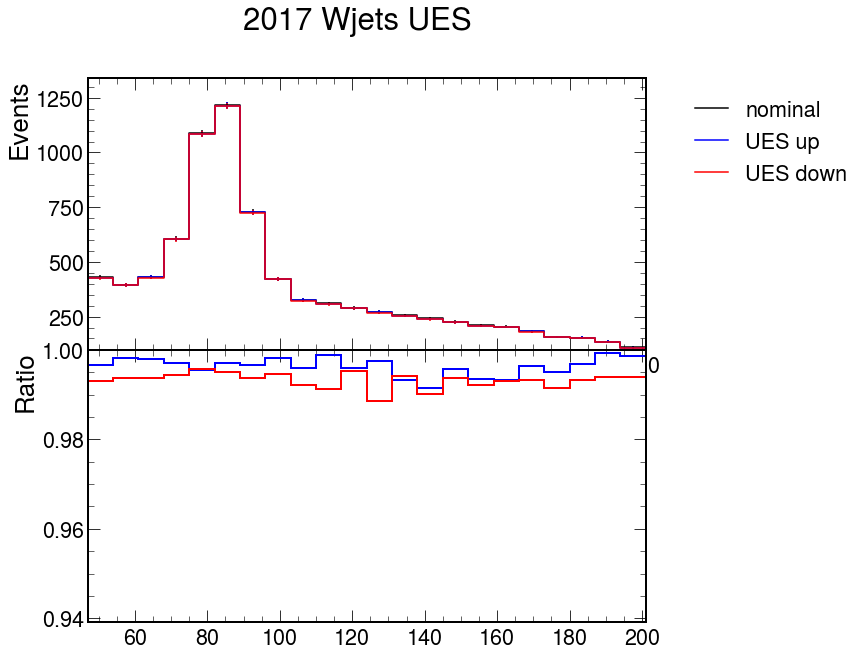

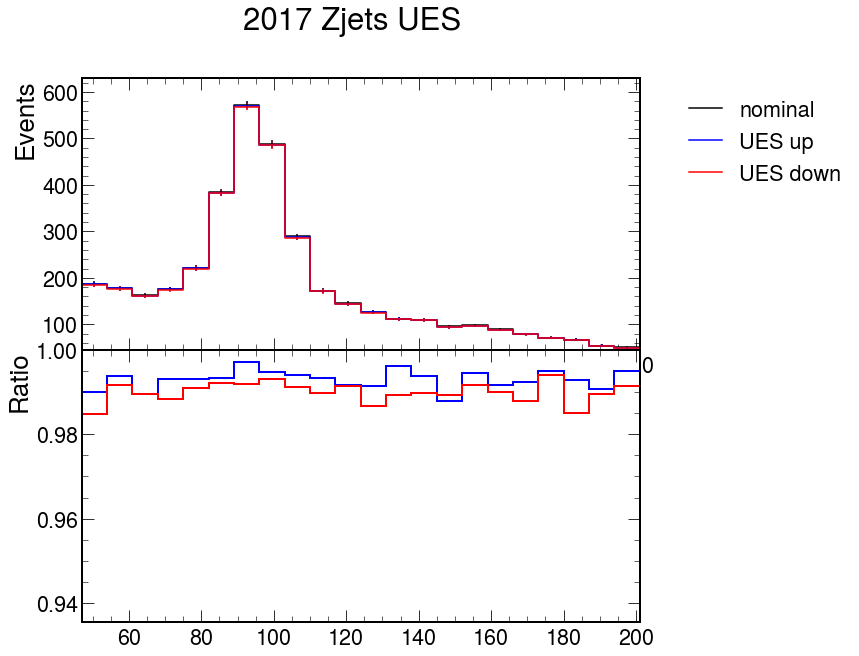

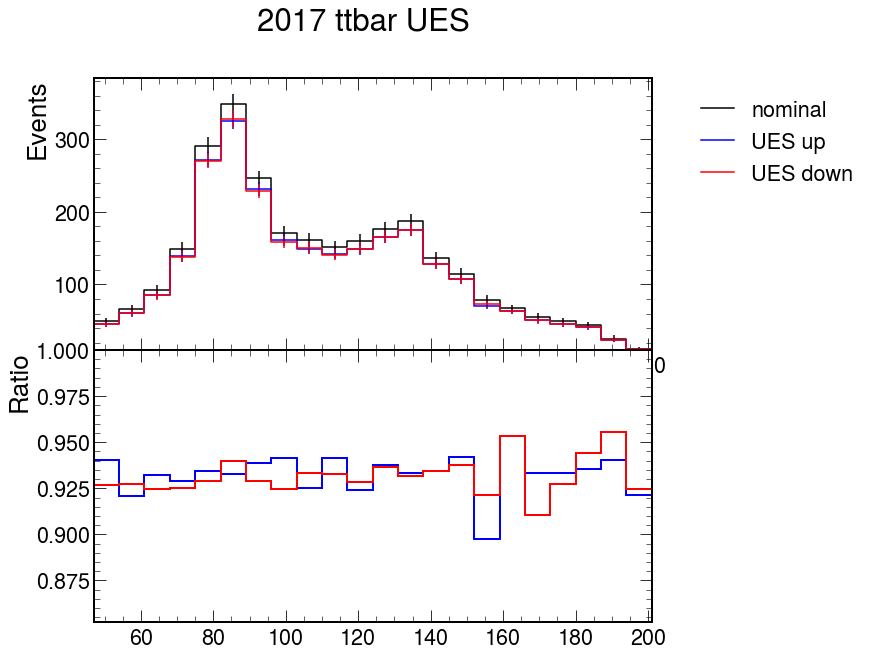

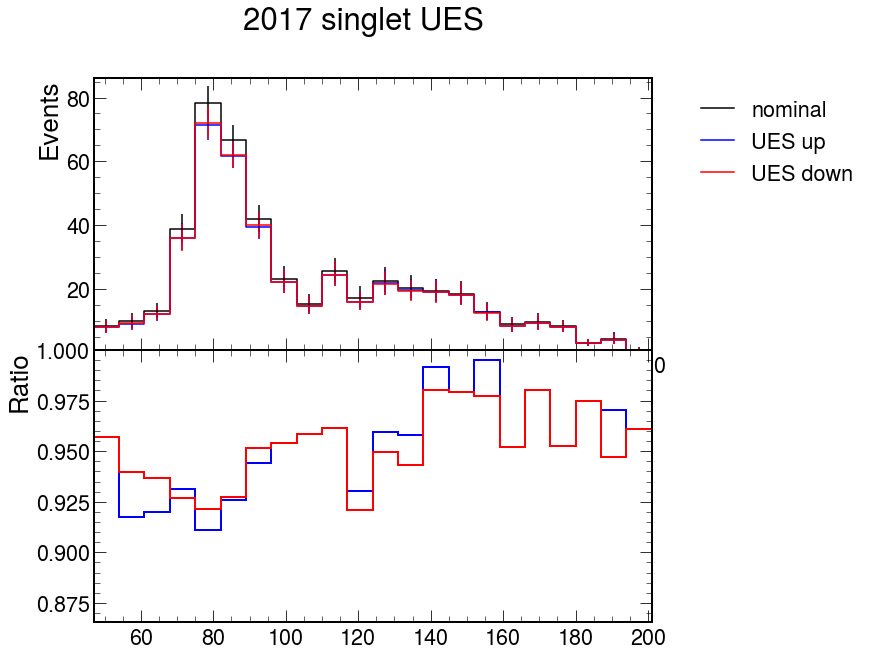

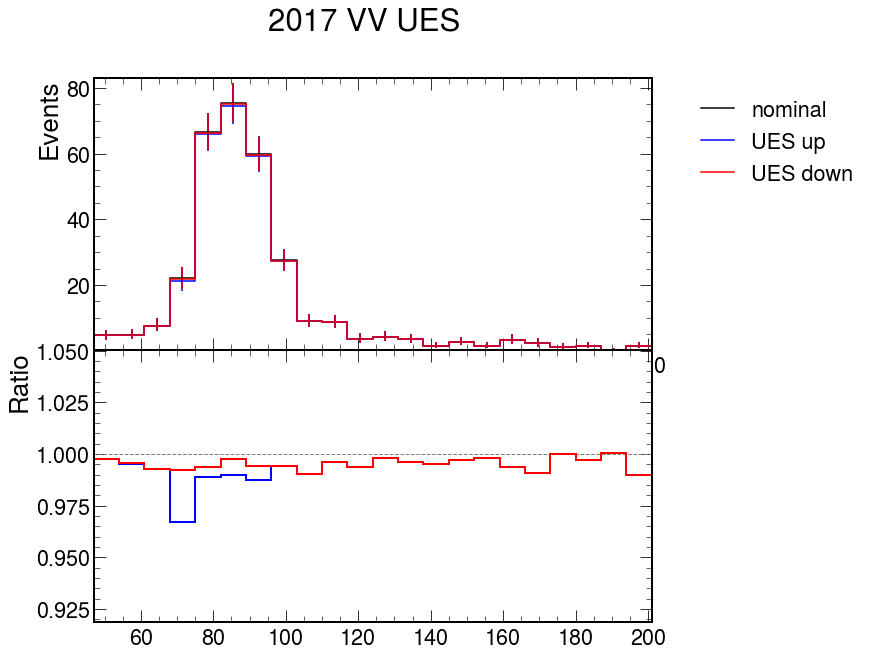

In [15]:
for p in mc:
    plot_syst(h.integrate('process',p),'UES',year+' '+p+' UES',year+'/syst_UES/'+p)

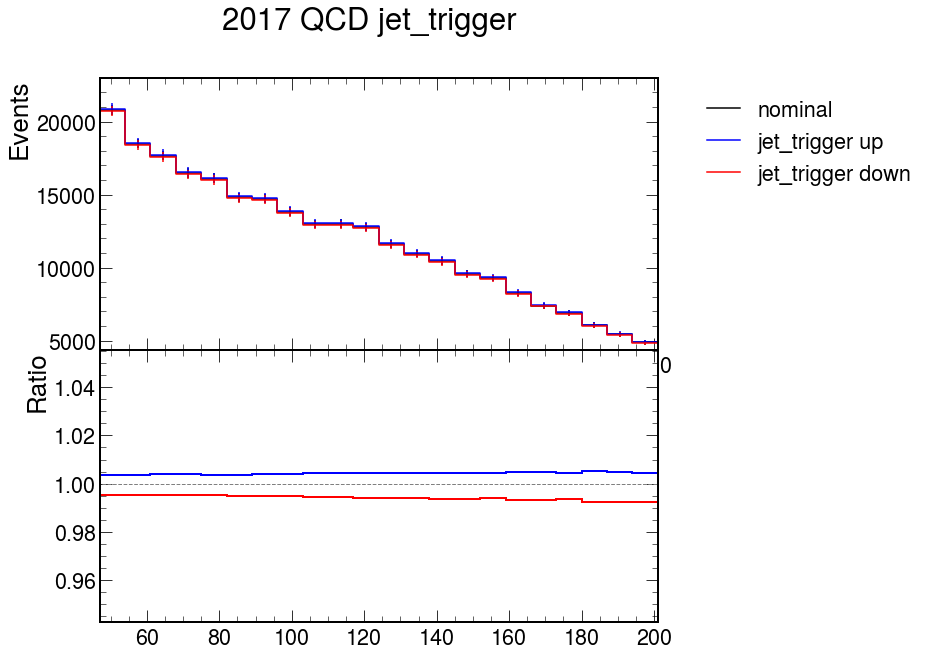

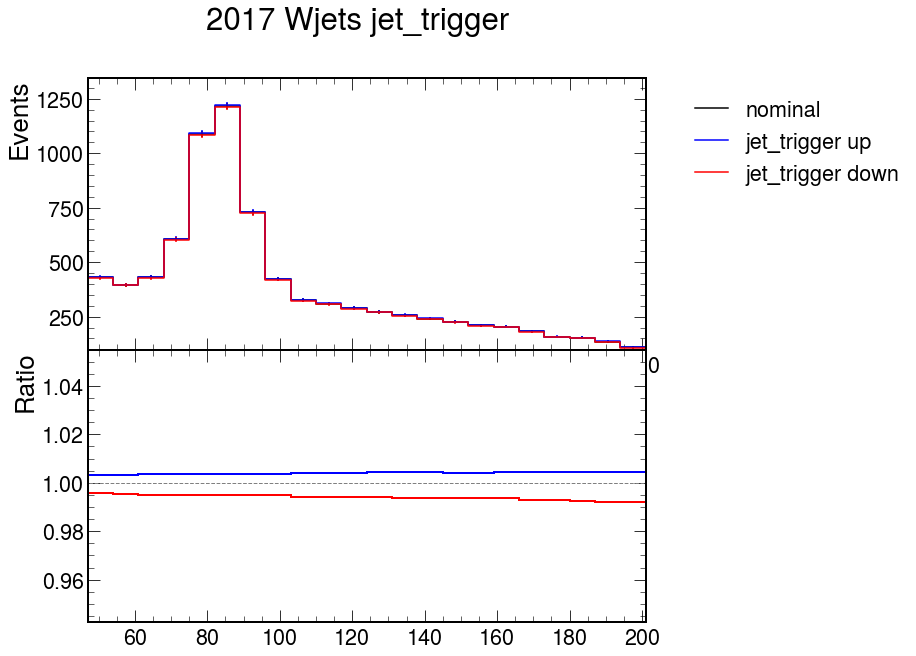

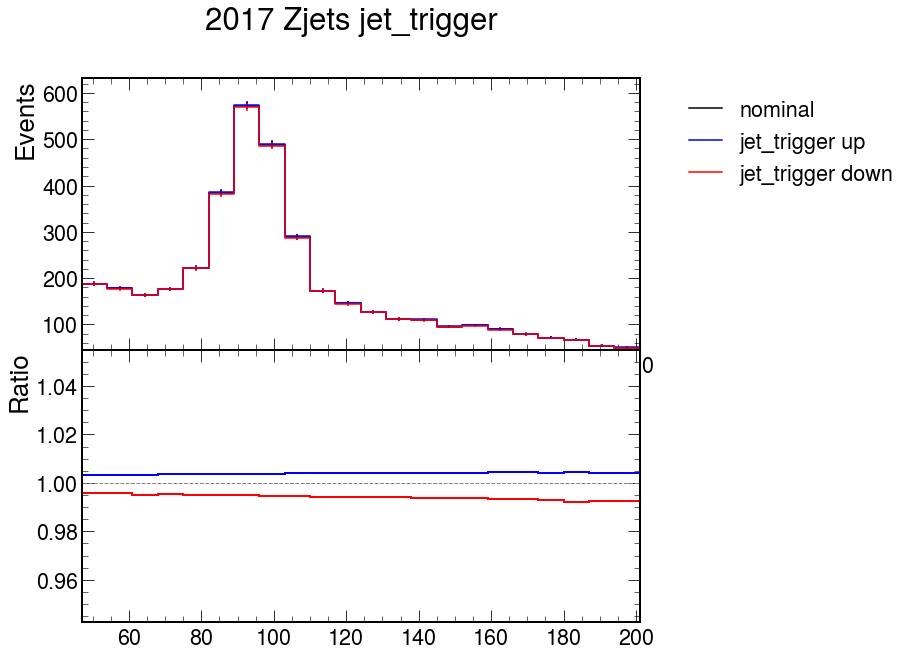

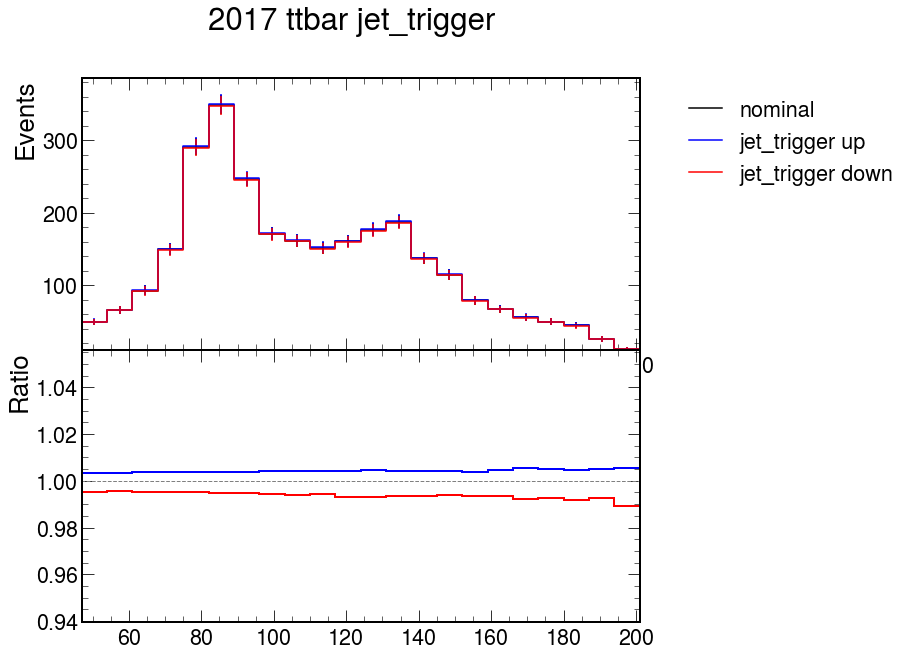

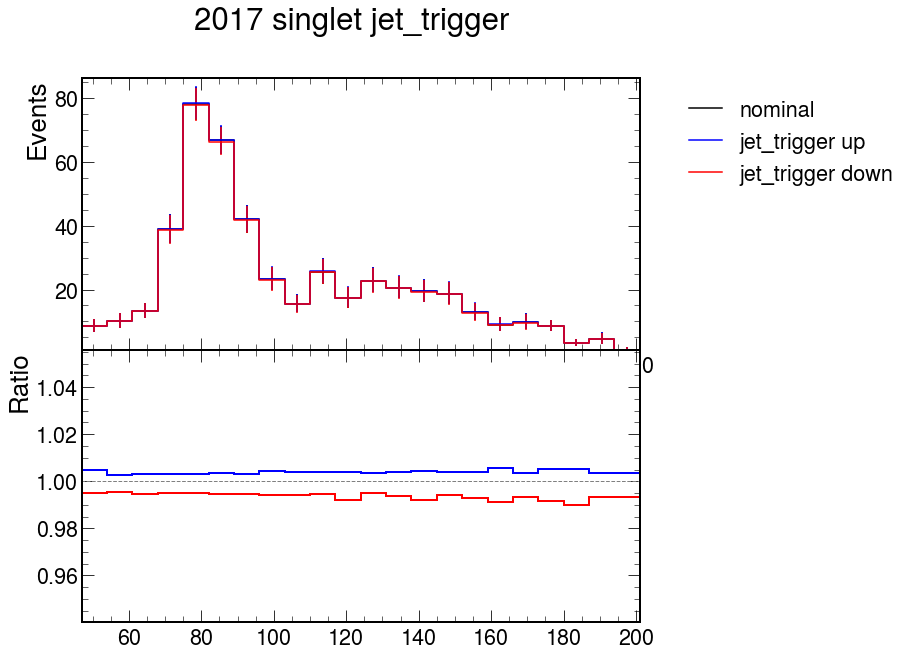

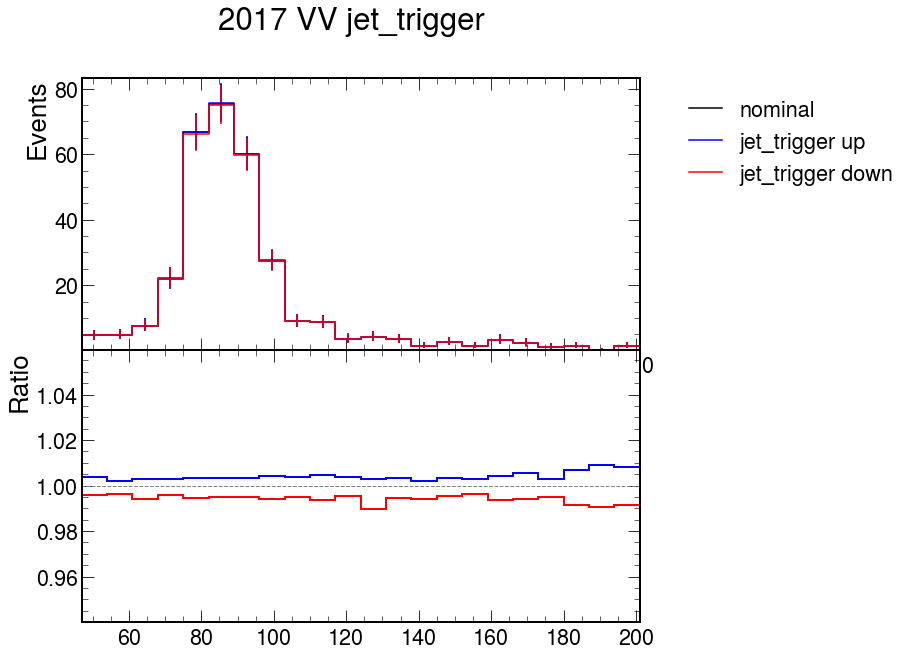

In [16]:
for p in mc:
    plot_syst(h.integrate('process',p),'jet_trigger',year+' '+p+' jet_trigger',year+'/syst_jet_trigger/'+p)

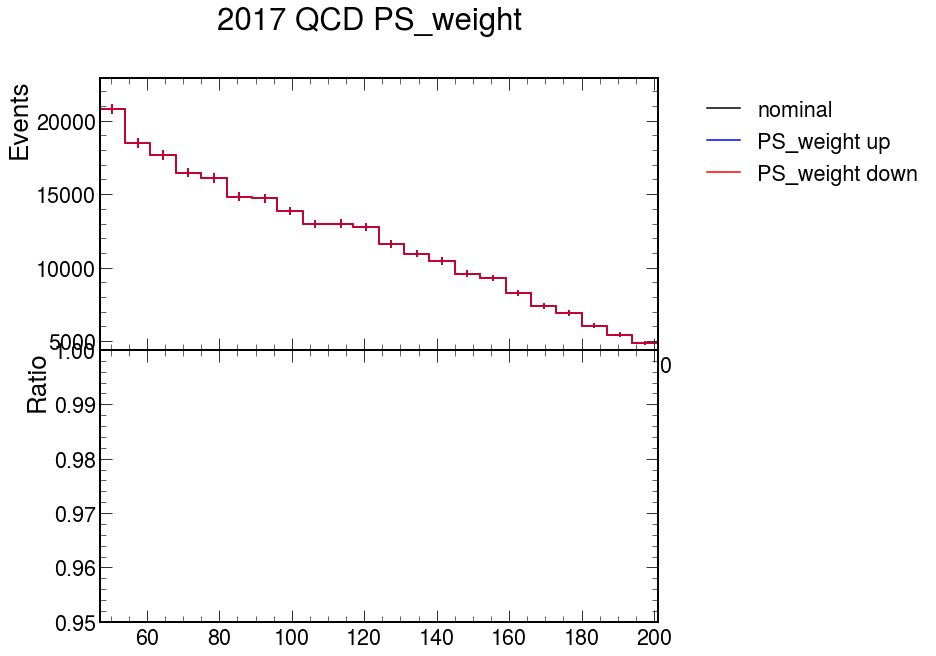

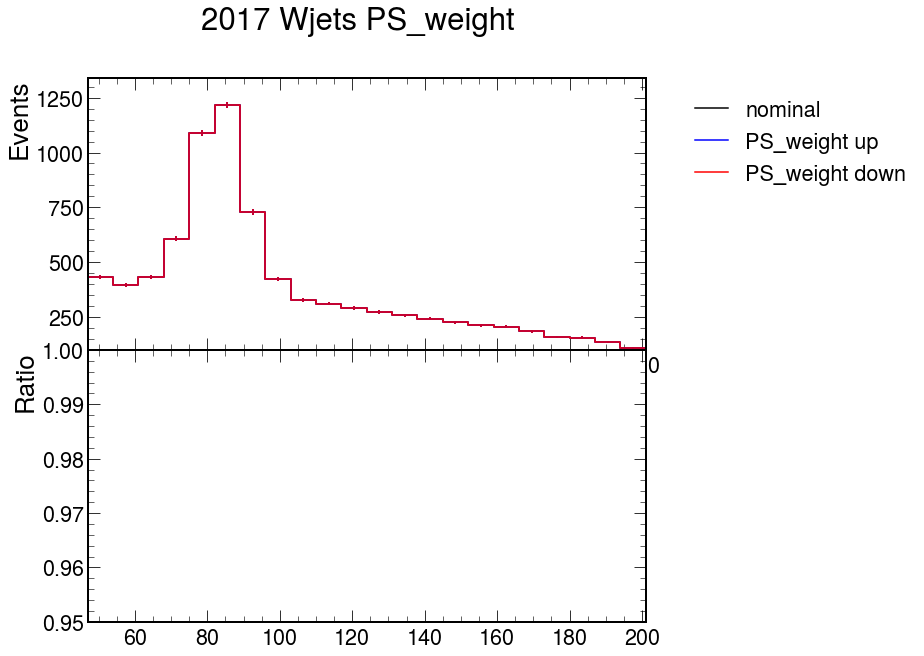

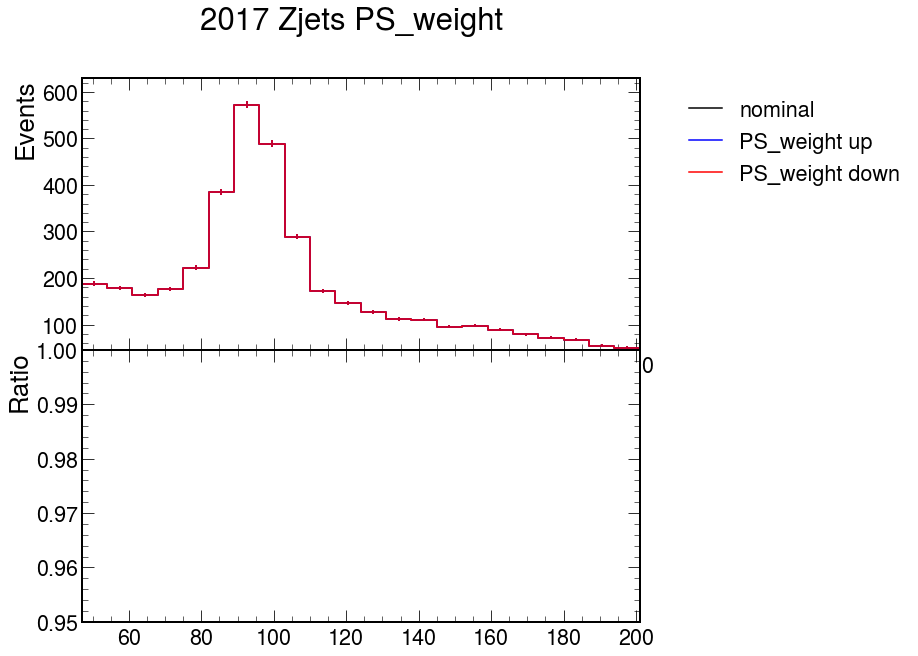

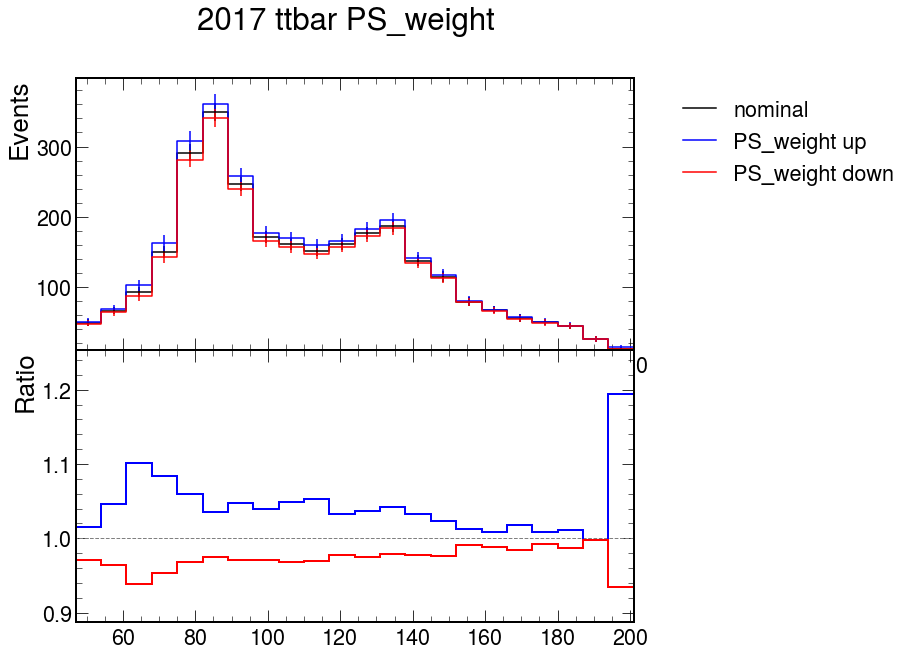

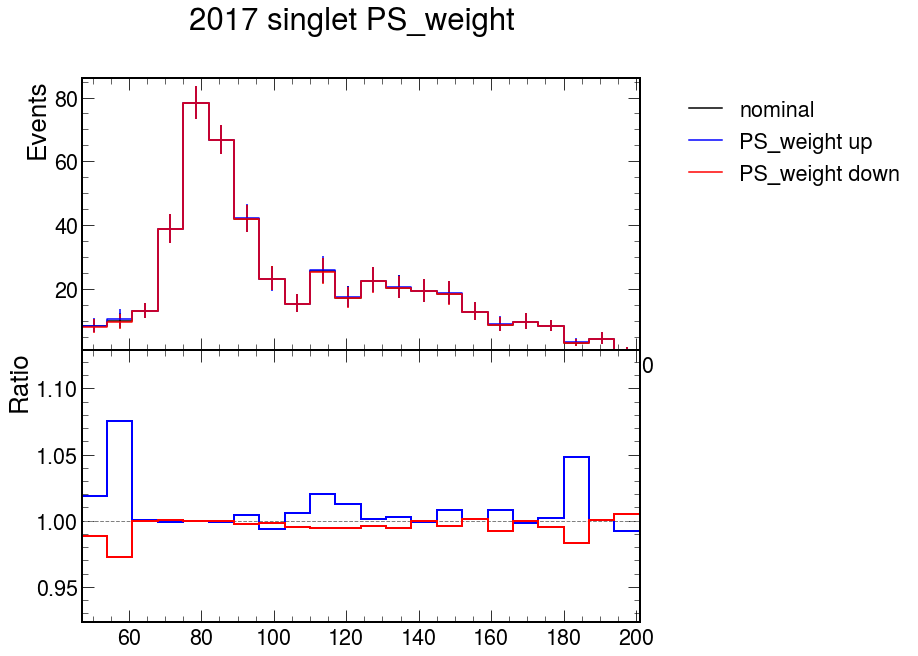

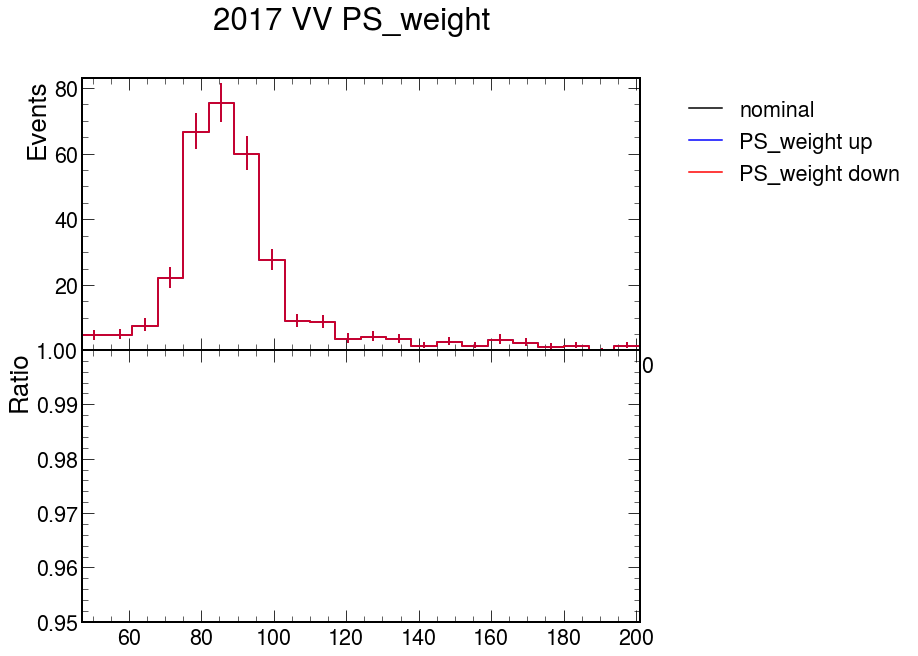

In [17]:
for p in mc:
    plot_syst(h.integrate('process',p),'PS_weight',year+' '+p+' PS_weight',year+'/syst_PS_weight/'+p)

In [ ]:
h = templates.sum('pt1','ddb1','DR').integrate('region', 'muoncontrol')
mc = ['QCD','Wjets','Zjets','ttbar','singlet','VV']#,'ggF','VBF','ZH','WH']

In [ ]:
for p in mc:
    plot_syst(h.integrate('process',p),'JES',p + ' JES')

In [ ]:
for p in mc:
    plot_syst(h.integrate('process',p),'JER',p + ' JER')

In [ ]:
for p in mc:
    plot_syst(h.integrate('process',p),'btagWeight',p + ' btagWeight')

In [ ]:
for p in mc:
    plot_syst(h.integrate('process',p),'btagEffStat',p + ' btagEffStat')

In [ ]:
for p in mc:
    plot_syst(h.integrate('process',p),'UES',p + ' UES')

In [ ]:
for p in mc:
    plot_syst(h.integrate('process',p),'jet_trigger',p + ' jet_trigger')

In [ ]:
for p in mc:
    plot_syst(h.integrate('process',p),'PS_weight',p + ' PS_weight')